In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob

from astropy.io import fits as pf
from keckcode_test.keckcode.esiredux import esi2d, esi1d
from specim_test.specim.specfuncs import spec2d, spec1d
from scipy.ndimage import map_coordinates, shift

In [2]:
file_loc = '../galaxy_spectra/ESI_data/*'

In [3]:
spec2d_file_list = []
var2d_file_list = []
#out_file = []
for i,p in enumerate(glob.glob(file_loc)):
    if 'J0248' in p:
        if 'bgsub.fits' in p:
            spec2d_file_list.append(p)
        elif 'var.fits' in p:
            var2d_file_list.append(p)

In [4]:
spec2d_file_list

['../galaxy_spectra/ESI_data/J0248+1913_0035_bgsub.fits',
 '../galaxy_spectra/ESI_data/J0248+1913_0034_bgsub.fits',
 '../galaxy_spectra/ESI_data/J0248+1913_0036_bgsub.fits']

In [5]:
var2d_file_list

['../galaxy_spectra/ESI_data/J0248+1913_0035_var.fits',
 '../galaxy_spectra/ESI_data/J0248+1913_0036_var.fits',
 '../galaxy_spectra/ESI_data/J0248+1913_0034_var.fits']

In [10]:
spec1 = esi2d.Esi2d(spec2d_file_list[1], varfile=var2d_file_list[2])
spec2 = esi2d.Esi2d(spec2d_file_list[0], varfile=var2d_file_list[0])
spec3 = esi2d.Esi2d(spec2d_file_list[2], varfile=var2d_file_list[1])

Order  Shape    Dispaxis
----- --------- --------
  1   3461x165     x
  2   4093x145     x
  3   4096x146     x
  4   4096x141     x
  5   4096x130     x
  6   4096x127     x
  7   4096x124     x
  8   4096x121     x
  9   4096x117     x
 10   4096x111     x
Order  Shape    Dispaxis
----- --------- --------
  1   3461x165     x
  2   4093x145     x
  3   4096x146     x
  4   4096x141     x
  5   4096x130     x
  6   4096x127     x
  7   4096x124     x
  8   4096x121     x
  9   4096x117     x
 10   4096x111     x
Order  Shape    Dispaxis
----- --------- --------
  1   3461x165     x
  2   4093x145     x
  3   4096x146     x
  4   4096x141     x
  5   4096x130     x
  6   4096x127     x
  7   4096x124     x
  8   4096x121     x
  9   4096x117     x
 10   4096x111     x


Profile max value (before normalization) 58.479884
Profile max value (before normalization) 53.980971
Profile max value (before normalization) 52.242154


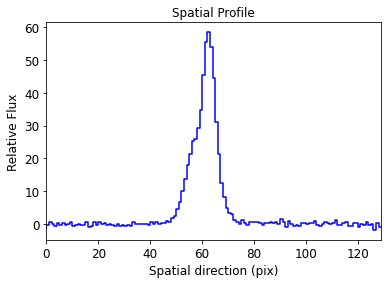

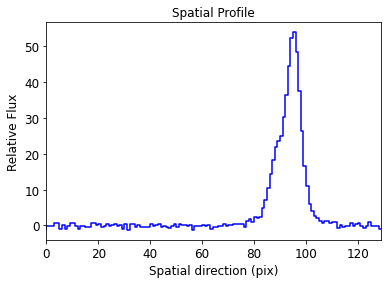

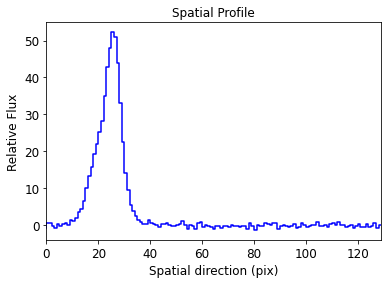

In [11]:
#%matplotlib notebook
pixrange = [1800, 2200]
profile1 = spec1[4].spatial_profile(pixrange=pixrange)
profile2 = spec2[4].spatial_profile(pixrange=pixrange)
profile3 = spec3[4].spatial_profile(pixrange=pixrange)


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 3
Number of Moffat profile : 0

Now enter constants of the background polynomial upto degree 0
c0 : 1

Enter parameter values for a Gaussian profile in following format...
amplitude_value, mu_value, sigma_value

Parameters of Gaussian profile 1 : 10, 52, 2

amplitude=10.000000, mu=52.000000, sigma=2.000000

Parameters of Gaussian profile 2 : 30, 57, 2

amplitude=30.000000, mu=57.000000, sigma=2.000000

Parameters of Gaussian profile 3 : 60, 63, 2

amplitude=60.000000, mu=63.000000, sigma=2.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=0.04148825)>

    [1]: <Gaussian1D(amplitude=10.80247317, mean=54.24122695, stddev=2.42246478)>

    [2]: <Gaussian1D

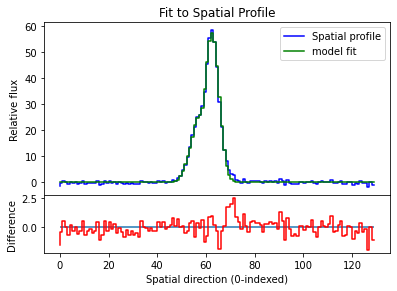

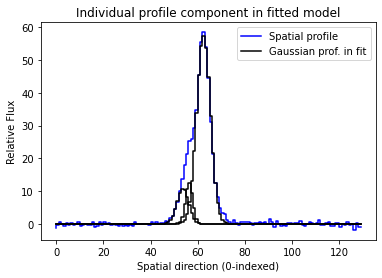


Do you want to start over ? : type yes/no
no


<CompoundModel(c0_0=0.04148825, amplitude_1=10.80247317, mean_1=54.24122695, stddev_1=2.42246478, amplitude_2=12.52471627, mean_2=56.86422168, stddev_2=1.52739809, amplitude_3=57.41659423, mean_3=62.95945665, stddev_3=2.88071339)>

In [16]:
spec1[4].initial_model()

In [12]:
ytrimlist = [[37, 97], [70, 130], [0, 60]]
spec2dlist = [spec1[4], spec2[4], spec3[4]]

In [13]:
sp_data = []
var_data = []

for i, p in enumerate(ytrimlist):
    ymin = p[0]
    ymax = p[1]
    sp_data.append(spec2dlist[i].data[ymin:ymax, :])
    var_data.append(spec2dlist[i].vardata[ymin:ymax, :])
    print(sp_data[i].shape, var_data[i].shape)

(60, 4096) (60, 4096)
(60, 4096) (60, 4096)
(60, 4096) (60, 4096)


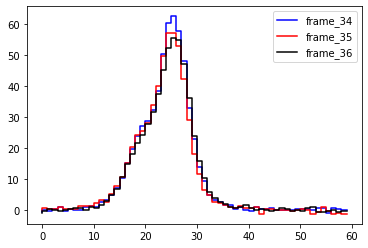

In [14]:
pixrange = [1900, 2400]
color = ['b', 'r', 'k']
label = ['frame_34', 'frame_35', 'frame_36']
for i, p in enumerate(sp_data):
    
    tmpdata = p[:, pixrange[0]:pixrange[1]]
    pflux = np.median(tmpdata, axis=1)
    x = np.arange(p.shape[0])
    plt.plot(x, pflux, color=color[i], drawstyle='steps', label=label[i])
plt.legend()

AttributeError: 'numpy.ndarray' object has no attribute 'npix'